## Reporte Ajuste Ecuaciones Modelos de Baterias Ion Litio
## A partir de los datos y resultados por tesis de Rafael de la Sotta

### Pablo Cornejo

version2

In [16]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


### Data Processing

- Extraction and generating Train/Test/Val sets

In [4]:
# Path to your TXT file in folder
txt_path = '/home/pcornejo/Tesis/benchmark_project/data/raw/battery/df_n_102.txt'

# Read the TXT file
with open(txt_path, 'r') as file:
    content = file.read()

# Print the first 100 characters of the file
print("First 100 characters of the file:")
print(content[:100])

# Print the total number of characters in the file
print(f"\nTotal characters in the file: {len(content)}")

First 100 characters of the file:
Current,K,Flujo,t_viento,Diametro,col_fluido,col_celda,n_fluido,n_celda,Rem,prandtl,colIndex,nusselt

Total characters in the file: 1650251


In [5]:
txt_path_25 = '/home/pcornejo/Tesis/benchmark_project/data/raw/battery/df_n_25.txt'
txt_path_53 = '/home/pcornejo/Tesis/benchmark_project/data/raw/battery/df_n_53.txt'
txt_path_74 = '/home/pcornejo/Tesis/benchmark_project/data/raw/battery/df_n_74.txt'
txt_path_102 = '/home/pcornejo/Tesis/benchmark_project/data/raw/battery/df_n_102.txt'

# Load the datasets
df_25 = pd.read_csv(txt_path_25)
df_53 = pd.read_csv(txt_path_53)
df_74 = pd.read_csv(txt_path_74)
df_102 = pd.read_csv(txt_path_102)

# Merge the training datasets (25 and 53)
df_train = pd.concat([df_25, df_53])

# Validation and test sets
df_val = df_102
df_test = df_74

# Select only the columns we need
selected_columns = ['K', 'Rem', 'prandtl', 'nusselt']

df_train_selected = df_train[selected_columns]
df_val_selected = df_val[selected_columns]
df_test_selected = df_test[selected_columns]

# Display the first few rows of each selected DataFrame
print("Training set:")
print(df_train_selected.head())

print("\nValidation set:")
print(df_val_selected.head())

print("\nTest set:")
print(df_test_selected.head())

# Print the shape of each selected DataFrame
print(f"\nTraining set shape: {df_train_selected.shape}")
print(f"Validation set shape: {df_val_selected.shape}")
print(f"Test set shape: {df_test_selected.shape}")

Training set:
     K          Rem   prandtl    nusselt
0  0.6  2795.874321  0.709843  61.165728
1  0.6  2795.874321  0.709843  52.824696
2  0.6  2310.732084  0.709842  50.527730
3  0.6  2795.776244  0.709842  59.596338
4  0.6  2795.776244  0.709841  54.687451

Validation set:
     K          Rem   prandtl    nusselt
0  0.6  2796.592710  0.709843  61.165728
1  0.6  2796.592710  0.709843  52.824696
2  0.6  2446.261529  0.709842  50.527730
3  0.6  2128.077694  0.709842  48.422178
4  0.6  1909.194425  0.709842  46.485070

Test set:
     K          Rem   prandtl    nusselt
0  0.6  2827.361047  0.709843  55.340421
1  0.6  2827.361047  0.709843  52.824696
2  0.6  2356.426510  0.709842  50.527730
3  0.6  2038.344639  0.709842  48.422178
4  0.6  1885.685153  0.709842  48.421871

Training set shape: (12300, 4)
Validation set shape: (17178, 4)
Test set shape: (12210, 4)


### Data Exploration

- Rem: Reynolds Number
- Prandtl: Prandtl Number
- Nusselt: Nusselt Number
- S: Factor Separacion

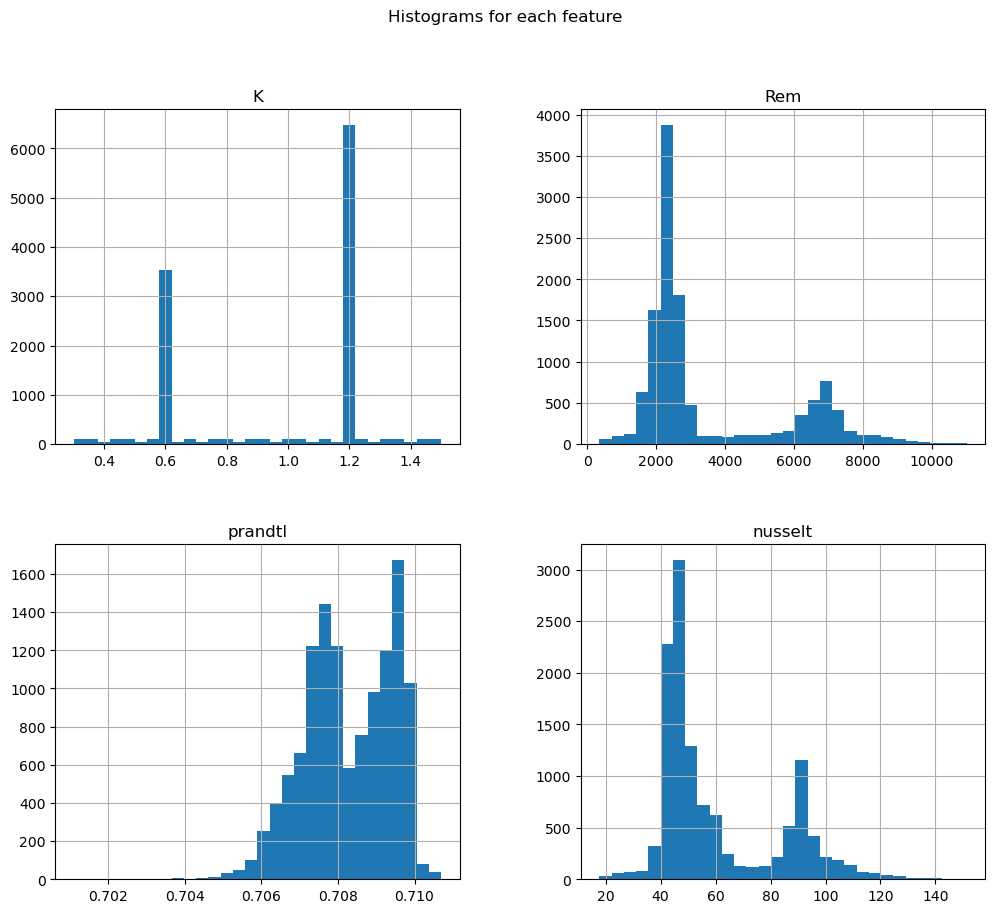

In [14]:
# Histogram for each column
df_train_selected.hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms for each feature')
plt.show()

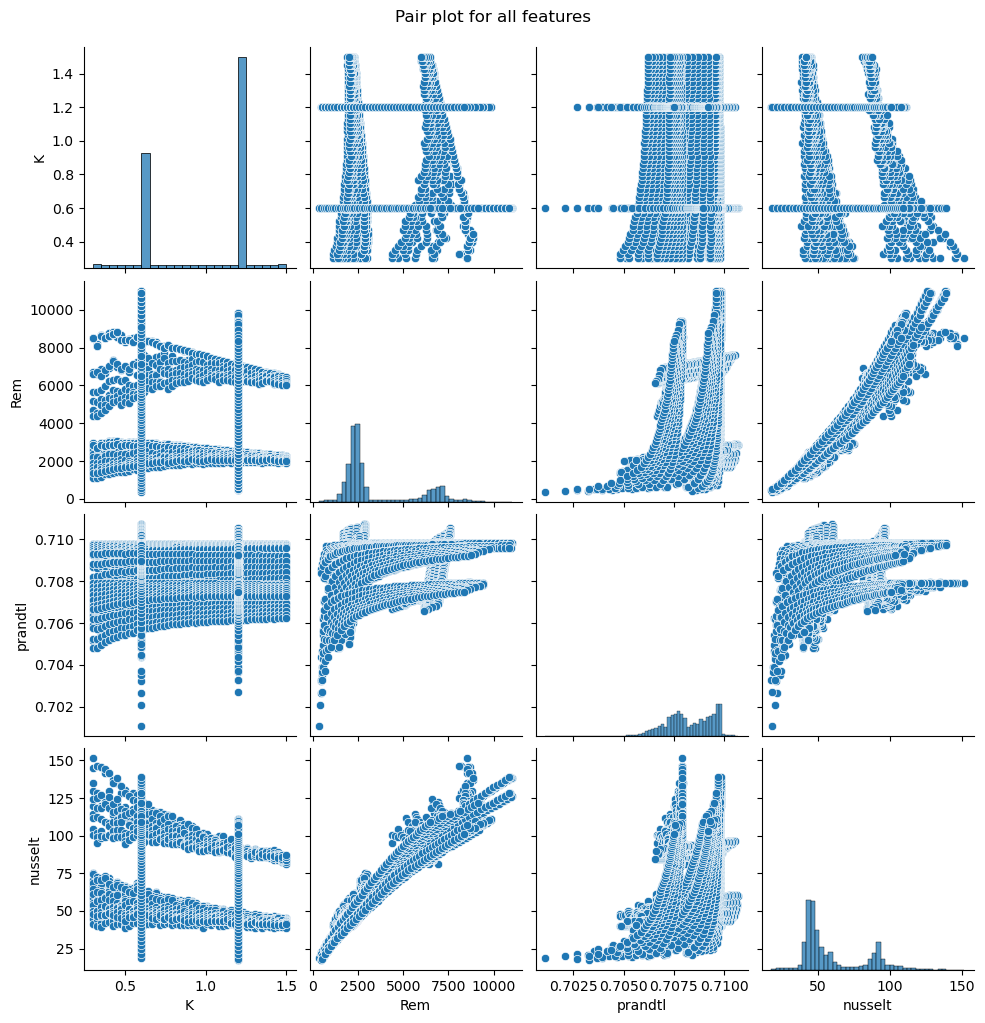

In [20]:
sns.pairplot(df_train_selected[['K', 'Rem', 'prandtl', 'nusselt']])
plt.suptitle('Pair plot for all features', y=1.02)
plt.show()


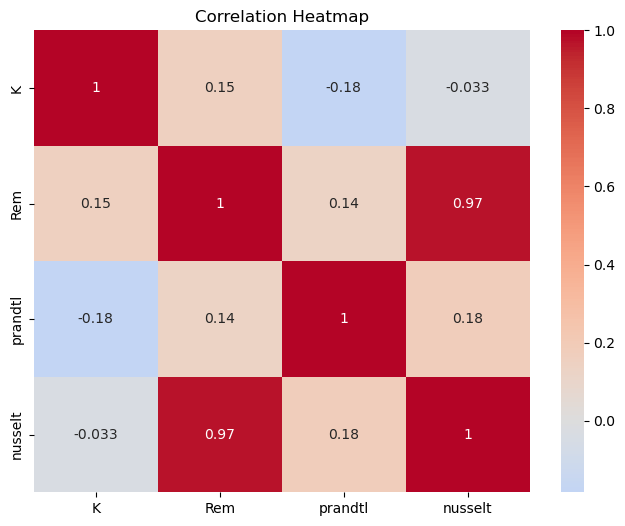

In [21]:
plt.figure(figsize=(8, 6))
corr_matrix = df_train_selected[['K', 'Rem', 'prandtl', 'nusselt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

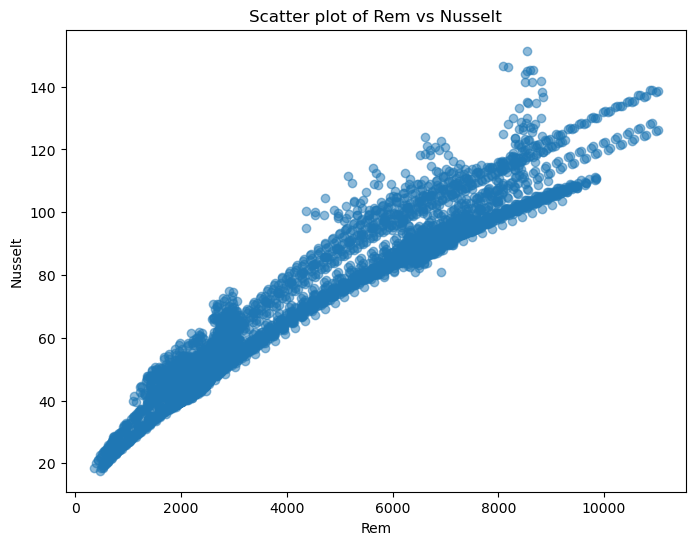

In [22]:
# Scatter plot between 'Rem' and 'nusselt'
plt.figure(figsize=(8, 6))
plt.scatter(df_train_selected['Rem'], df_train_selected['nusselt'], alpha=0.5)
plt.xlabel('Rem')
plt.ylabel('Nusselt')
plt.title('Scatter plot of Rem vs Nusselt')
plt.show()

In [8]:
df_train_selected.describe()

,K,Rem,prandtl,nusselt
count,17178.000000,17178.000000,17178.000000,17178.000000
mean,0.971672,3108.943470,0.707451,56.043785
std,0.303646,1978.031278,0.001707,21.622201
min,0.300000,286.618666,0.689234,14.405186
25%,0.600000,1831.120686,0.706408,41.257844
50%,1.200000,2179.715619,0.707535,45.162219
75%,1.200000,4323.343031,0.708938,74.790358
max,1.500000,10962.630303,0.710696,153.446755


<Axes: >

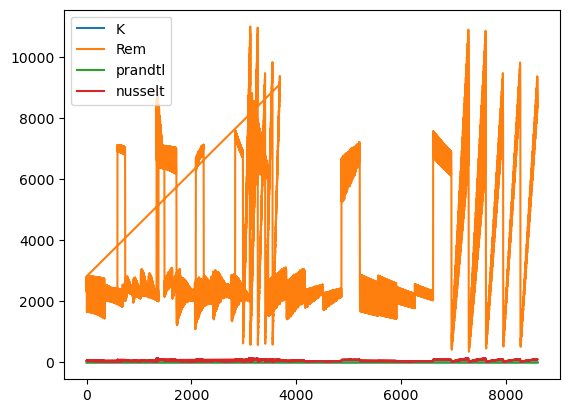

In [13]:
df_train_selected.plot()

In [9]:
df_val_selected.describe()

,K,Rem,prandtl,nusselt
count,17178.000000,17178.000000,17178.000000,17178.000000
mean,0.971672,3108.943470,0.707451,56.043785
std,0.303646,1978.031278,0.001707,21.622201
min,0.300000,286.618666,0.689234,14.405186
25%,0.600000,1831.120686,0.706408,41.257844
50%,1.200000,2179.715619,0.707535,45.162219
75%,1.200000,4323.343031,0.708938,74.790358
max,1.500000,10962.630303,0.710696,153.446755


In [10]:
df_test_selected.describe()

,K,Rem,prandtl,nusselt
count,12210.000000,12210.000000,12210.000000,12210.000000
mean,0.971007,3235.678436,0.707838,56.974414
std,0.303531,2019.545327,0.001408,21.530198
min,0.300000,307.042704,0.695312,16.412658
25%,0.600000,1943.283459,0.706880,42.084045
50%,1.200000,2272.281351,0.707805,46.306401
75%,1.200000,4515.544647,0.709155,75.598199
max,1.500000,11139.866107,0.710697,146.968926


### Nusselt Function

Structure for Nusselt number: 

$Nu = C \cdot Re^n \cdot Pr^m$

Result proposed by RdlS:

 $Nu = 0.5 \cdot S^{-0.2} \cdot Re^{0.64} \cdot Pr$


We can check how well the data fits this equation by measuring the MSE between the ground data and the data generated by the equation formula

In [83]:
def nusselt_fn(S, Re, Pr):
    # Predicted function by RdlS in the thesis
    return 0.5 * S ** (-0.2) * Re **(0.64) * Pr

In [86]:
def nusselt_fn(S, Re, Pr):
    # Predicted function by RdlS in the thesis
    #t.1.1
    return 0.666 * S ** (-0.2) * Re **(0.64) * Pr**2

In [89]:
def nusselt_fn(S, Re, Pr):
    # Predicted function by RdlS in the thesis
    #t.1.2
    return 0.668 * S ** (-0.2) * Re **(0.64) * Pr**2 - S

In [95]:
def nusselt_fn(S, Re, Pr):
    # Predicted function by RdlS in the thesis
    #t.1.2
    return 0.575 * S ** (-0.2) * Re **(0.615) * Pr**0.8

In [96]:
predicted_nusselt_train = nusselt_fn(df_train_selected["K"], df_train_selected["Rem"], df_train_selected["prandtl"])
predicted_nusselt_val = nusselt_fn(df_val_selected["K"], df_val_selected["Rem"], df_val_selected["prandtl"])
predicted_nusselt_test = nusselt_fn(df_test_selected["K"], df_test_selected["Rem"], df_test_selected["prandtl"])

In [97]:
mse_train = mean_squared_error(df_train_selected["nusselt"], predicted_nusselt_train)
mse_val = mean_squared_error(df_val_selected["nusselt"], predicted_nusselt_val)
mse_test = mean_squared_error(df_test_selected["nusselt"], predicted_nusselt_test)
print(mse_train)
print(mse_val)
print(mse_test)

28.431213455503237
17.15026577254356
23.0885007410274


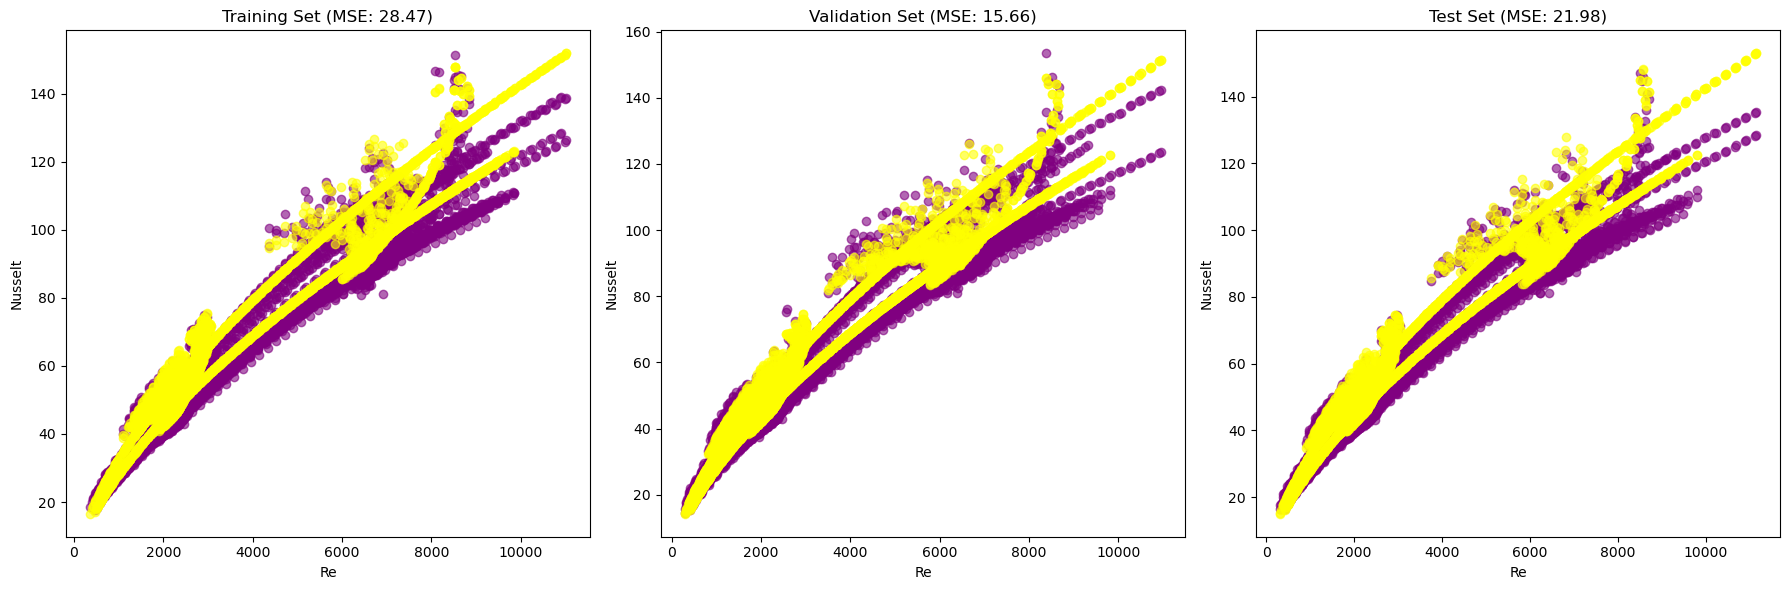

In [9]:
# Create a figure with subplots for training, validation, and test sets
plt.figure(figsize=(18, 6))

# Plot for Training Set
plt.subplot(1, 3, 1)
plt.scatter(df_train_selected["Rem"], df_train_selected["nusselt"], color='purple', alpha=0.6)
plt.scatter(df_train_selected["Rem"], predicted_nusselt_train, color='yellow', alpha=0.6)

plt.title(f'Training Set (MSE: {mse_train:.2f})')
plt.xlabel('Re')
plt.ylabel('Nusselt')

# Plot for Validation Set
plt.subplot(1, 3, 2)
plt.scatter(df_val_selected["Rem"], df_val_selected["nusselt"], color='purple', alpha=0.6)
plt.scatter(df_val_selected["Rem"], predicted_nusselt_val, color='yellow', alpha=0.6)

plt.title(f'Validation Set (MSE: {mse_val:.2f})')
plt.xlabel('Re')
plt.ylabel('Nusselt')

# Plot for Test Set
plt.subplot(1, 3, 3)
plt.scatter(df_test_selected["Rem"], df_test_selected["nusselt"], color='purple', alpha=0.6)
plt.scatter(df_test_selected["Rem"], predicted_nusselt_test, color='yellow', alpha=0.6)

plt.title(f'Test Set (MSE: {mse_test:.2f})')
plt.xlabel('Re')
plt.ylabel('Nusselt')

# Adjust layout
plt.tight_layout()
plt.show()

26.324833258950918
25.565821971427674
23.183453722638113


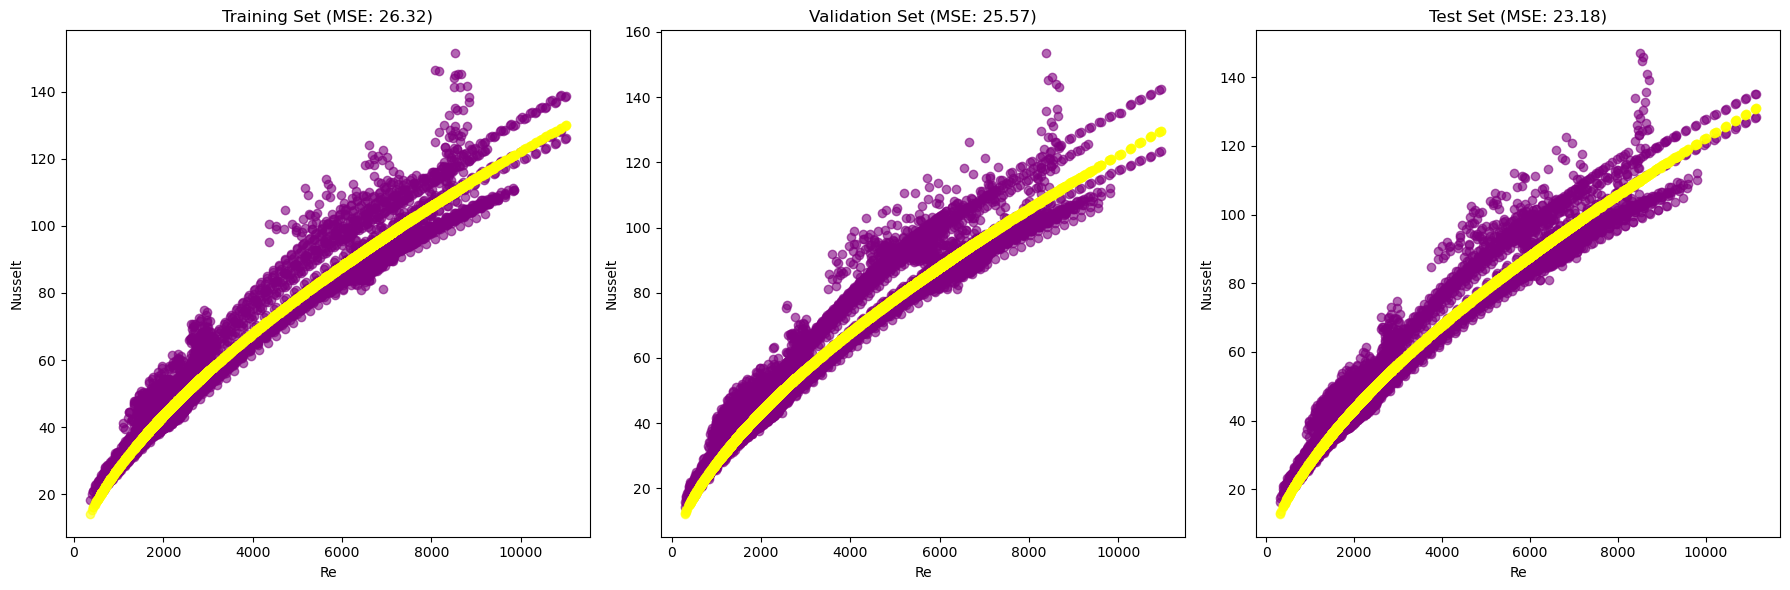

In [10]:
predicted_nusselt_train = nusselt_fn(1.3, df_train_selected["Rem"], df_train_selected["prandtl"])
predicted_nusselt_val = nusselt_fn(1.3, df_val_selected["Rem"], df_val_selected["prandtl"])
predicted_nusselt_test = nusselt_fn(1.3, df_test_selected["Rem"], df_test_selected["prandtl"])

mse_train = mean_squared_error(df_train_selected["nusselt"], predicted_nusselt_train)
mse_val = mean_squared_error(df_val_selected["nusselt"], predicted_nusselt_val)
mse_test = mean_squared_error(df_test_selected["nusselt"], predicted_nusselt_test)

mae_train = 

print(mse_train)
print(mse_val)
print(mse_test)

# Create a figure with subplots for training, validation, and test sets
plt.figure(figsize=(18, 6))

# Plot for Training Set
plt.subplot(1, 3, 1)
plt.scatter(df_train_selected["Rem"], df_train_selected["nusselt"], color='purple', alpha=0.6)
plt.scatter(df_train_selected["Rem"], predicted_nusselt_train, color='yellow', alpha=0.6)

plt.title(f'Training Set (MSE: {mse_train:.2f})')
plt.xlabel('Re')
plt.ylabel('Nusselt')

# Plot for Validation Set
plt.subplot(1, 3, 2)
plt.scatter(df_val_selected["Rem"], df_val_selected["nusselt"], color='purple', alpha=0.6)
plt.scatter(df_val_selected["Rem"], predicted_nusselt_val, color='yellow', alpha=0.6)

plt.title(f'Validation Set (MSE: {mse_val:.2f})')
plt.xlabel('Re')
plt.ylabel('Nusselt')

# Plot for Test Set
plt.subplot(1, 3, 3)
plt.scatter(df_test_selected["Rem"], df_test_selected["nusselt"], color='purple', alpha=0.6)
plt.scatter(df_test_selected["Rem"], predicted_nusselt_test, color='yellow', alpha=0.6)

plt.title(f'Test Set (MSE: {mse_test:.2f})')
plt.xlabel('Re')
plt.ylabel('Nusselt')

# Adjust layout
plt.tight_layout()
plt.show()

### Fitting Models

In [26]:
from gplearn.genetic import SymbolicRegressor

In [13]:
X_train = df_train_selected[['K', 'Rem', 'prandtl']]
y_train = df_train_selected['nusselt']

X_test = df_test_selected[['K', 'Rem', 'prandtl']]
y_test = df_test_selected['nusselt']

# Create and fit the SymbolicRegressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,
                           stopping_criteria=0.01,
                           p_crossover=0.7,
                           p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05,
                           p_point_mutation=0.1,
                           max_samples=0.9,
                           verbose=1,
                           parsimony_coefficient=0.01,
                           random_state=42)

est_gp.fit(X_train, y_train)

# Make predictions
y_pred = est_gp.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Print the obtained equation
print("\nObtained equation:")
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    33.09      9.24918e+22       63          12.8595          13.5814      2.04m
   1    17.37      3.14799e+11        7          12.6997          12.6332      1.49m
   2    28.90      2.80122e+08        9          5.66744          5.53188      1.73m
   3    38.37      5.39779e+13        9          4.41421          4.70908      1.84m
   4    21.39      3.57215e+11        9          4.43079          4.55986      1.33m
   5    19.48      1.77992e+14       31          2.87925           2.7845      1.22m
   6    19.62      5.39509e+12       31          2.86397          2.92207      1.16m
   7    17.69      3.98004e+07       31          2.77871          2.74152      1.06m
   8    17.72      2.53782e+10       33          2.45713          2.53635  

In [14]:
# Convert the equation to a more readable format
def simplify_equation(equation):
    equation = equation.replace("X0", "K")
    equation = equation.replace("X1", "Re")
    equation = equation.replace("X2", "Pr")
    return equation

print("\nSimplified equation:")
print(simplify_equation(str(est_gp._program)))


Simplified equation:
add(add(add(Pr, K), K), sub(mul(Re, 0.011), mul(div(0.732, Re), mul(div(div(Pr, div(-0.031, Pr)), add(0.514, K)), sub(Re, mul(add(Re, -0.878), sub(-0.515, Pr)))))))


### new

In [51]:
from gplearn.functions import make_function

In [60]:
# creando funciones auxiliares

# 0.5 * S ^(-0.2) * Re ^0.64 * Pr
def pot1(x1, x2, x3, x4):
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.where((x1 > 0) & (x2>0) & (x3>0), x4*x1**(-0.2)* x2 **(0.64) * x3, 0)
    return result

pot1_fn = make_function(function=pot1, 
                        name='pot1', 
                        arity=4)



In [61]:
X_train = df_train_selected[['K', 'Rem', 'prandtl']]
y_train = df_train_selected['nusselt']

X_test = df_test_selected[['K', 'Rem', 'prandtl']]
y_test = df_test_selected['nusselt']

# Create and fit the SymbolicRegressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,
                           stopping_criteria=0.01,
                           p_crossover=0.7,
                           p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05,
                           p_point_mutation=0.1,
                           max_samples=0.9,
                           verbose=1,
                           parsimony_coefficient=0.01,
                           random_state=42,
                           function_set=[pot1_fn])

est_gp.fit(X_train, y_train)

# Make predictions
y_pred = est_gp.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Print the obtained equation
print("\nObtained equation:")
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   757.77      1.04578e+17        5          4.50291          4.49002    112.34m
   1    13.23      3.60611e+10        5          2.99221          3.00899      3.14m
   2    10.84      8.23556e+08        9          2.22353          2.22825      2.28m
   3    12.01      5.48807e+19       17          2.15085          2.08206      2.33m
   4     7.49      6.43924e+06        9          1.78234          1.82187      1.94m
   5     7.48      6.00158e+06        9          1.78292          1.81665      1.69m
   6     9.66      9.65755e+09        9          1.77736          1.76494      1.69m
   7     9.69      6.14936e+08        9          1.77479          1.88978      1.59m
   8     9.49      1.10337e+09        9          1.68031          1.63609  

In [71]:
X_train = df_train_selected[['K', 'Rem', 'prandtl']]
y_train = df_train_selected['nusselt']

X_test = df_test_selected[['K', 'Rem', 'prandtl']]
y_test = df_test_selected['nusselt']

# Create and fit the SymbolicRegressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,
                           stopping_criteria=0.01,
                           p_crossover=0.7,
                           p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05,
                           p_point_mutation=0.1,
                           max_samples=0.9,
                           verbose=1,
                           parsimony_coefficient=0.01,
                           random_state=42,
                           function_set=['add', 'sub', 'mul', 'div', pot1_fn])

est_gp.fit(X_train, y_train)

# Make predictions
y_pred = est_gp.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Print the obtained equation
print("\nObtained equation:")
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    75.65      6.06427e+23        7          4.76747          4.81384      6.54m
   1    27.33      1.20497e+16        7           4.7616          4.86669      2.77m
   2    41.48      6.14505e+09       19          1.78345          1.77055      3.53m
   3    26.61      2.40381e+11       19          1.77439          1.85213      2.45m
   4    17.22      9.22373e+18        9          1.70601           1.6764      1.77m
   5    24.83      1.08527e+07        9          1.70479          1.68741      2.10m
   6    26.99      1.41887e+09        9          1.69396          1.78484      2.03m
   7    18.64      8.67499e+08       11          1.67645           1.6598      1.39m
   8    16.15      7.81131e+10       15            1.662          1.63828  

In [80]:
# creando funciones auxiliares

# 0.5 * S ^(-0.2) * Re ^0.64 * Pr
def pot2(x1, x2, x3, c1, c2):
    condition = (c2 > 0) & (c2 < 1)
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.where((x1 > 0) & (x2>0) & (x3>0) & condition, c1*x1**(-0.2)* x2 **(c2) * x3, 0)
    return result

pot2_fn = make_function(function=pot2, 
                        name='pot2', 
                        arity=5)


In [82]:
X_train = df_train_selected[['K', 'Rem', 'prandtl']]
y_train = df_train_selected['nusselt']

X_test = df_test_selected[['K', 'Rem', 'prandtl']]
y_test = df_test_selected['nusselt']

# Create and fit the SymbolicRegressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,
                           stopping_criteria=0.01,
                           p_crossover=0.7,
                           p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05,
                           p_point_mutation=0.1,
                           max_samples=0.9,
                           verbose=1,
                           parsimony_coefficient=0.01,
                           random_state=42,
                           function_set=[pot2_fn])

est_gp.fit(X_train, y_train)

# Make predictions
y_pred = est_gp.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Print the obtained equation
print("\nObtained equation:")
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/tmp/ipykernel_111914/2181146867.py:7: RuntimeWarning: overflow encountered in power
  result = np.where((x1 > 0) & (x2>0) & (x3>0) & condition, c1*x1**(-0.2)* x2 **(c2) * x3, 0)
/tmp/ipykernel_111914/2181146867.py:7: RuntimeWarning: overflow encountered in multiply
  result = np.where((x1 > 0) & (x2>0) & (x3>0) & condition, c1*x1**(-0.2)* x2 **(c2) * x3, 0)


   0  2511.30      7.73901e+06       16          52.5255          53.7896    512.01m
   1    17.15      2.07063e+08        6          18.0338               18      5.95m
   2     5.80      6.67761e+06        6          2.76281          2.83642      3.13m
   3     8.98      5.86972e+07        6          2.75167          2.93673      3.15m
   4     7.70      2.26908e+07       11          1.97272          2.06634      3.07m
   5     7.53           425009       11          1.97145          2.07776      2.57m
   6     7.03      1.14756e+06       11          1.97105          2.08135      2.37m
   7     7.59      7.22955e+06       11          1.96316          2.15237      2.33m
   8    10.39          21896.9       11            1.962          2.16279      2.14m
   9    11.30      2.70841e+08       11          1.96465          2.13894      2.10m
  10    11.68      1.00004e+06       11           1.9649          2.13669      1.85m
  11    11.54       1.2875e+06       11          1.96294         

### old

In [ ]:
from gplearn.functions import make_function

# Custom function to enforce the structure: expr * (Re**Constant) * (Pr)
def custom_structure(expr, Re, Pr, C1):
    #Re = np.clip(Re, 352, 11015)
    #Pr = np.clip(Pr, 0.7010933443893791, 0.7106964026595648)
    #C1 = np.clip(C1, 0, 1)

    print(Re)
    print(C1)
    exit()
    return expr * (Re**C1) * (Pr)

structure_func = make_function(function=custom_structure, name='structure', arity=4)

# Define custom power function
def custom_power(x, const):
    return np.power(x, const)

power_func = make_function(function=custom_power, name='pow', arity=2)

def safe_mse(y_true, y_pred):
    y_pred = np.nan_to_num(y_pred, nan=1e100, posinf=1e100, neginf=-1e100)
    return mean_squared_error(y_true, y_pred)

est_gp = SymbolicRegressor(
    population_size=200,  # Initial population
    generations=200,      # Number of generations
    tournament_size=3,    # Selection: Tournament of size 3
    p_crossover=0.8,      # Recombination rate
    p_subtree_mutation=0.1,  # Mutation rate
    p_hoist_mutation=0.0,
    p_point_mutation=0.0,
    const_range=(0.0, 1.0),  # Range for constants
    init_depth=(2, 6),
    function_set=['add', 'sub', 'mul', 'div', structure_func],
    metric='mse',
    parsimony_coefficient=0.01,
    random_state=0,
    n_jobs=-1
)

est_gp.fit(X_train, y_train)

# Make predictions
y_pred = est_gp.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Print the obtained equation
print("\nObtained equation:")
print(est_gp._program)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


NameError: name 'np' is not defined

: 

In [36]:
print("\nSimplified equation:")
print(simplify_equation(str(est_gp._program)))


Simplified equation:
add(sub(sub(0.481, K), K), add(sub(sub(0.761, K), K), add(div(mul(div(Re, 0.481), my_custom_func(0.481, 0.766, Re)), K), add(my_custom_func(Re, Pr, 0.537), div(mul(div(Re, 0.481), my_custom_func(0.481, 0.766, Re)), K)))))


In [15]:
def safe_exp(x):
    try:
        return np.exp(x)
    except OverflowError:
        return np.finfo(float).max

def custom_structure(expr, Re, Pr, C1, C2):
    log_result = np.log(np.abs(expr) + 1e-10) + C1 * np.log(Re + 1e-10) + C2 * np.log(Pr + 1e-10)
    return safe_exp(log_result)

structure_func = make_function(function=custom_structure, name='structure', arity=5)

def safe_mse(y_true, y_pred):
    y_pred = np.nan_to_num(y_pred, nan=np.finfo(float).max, posinf=np.finfo(float).max, neginf=np.finfo(float).min)
    return mean_squared_error(y_true, y_pred)

est_gp = SymbolicRegressor(
    population_size=200,  # Initial population
    generations=200,      # Number of generations
    tournament_size=3,    # Selection: Tournament of size 3
    p_crossover=0.8,      # Recombination rate
    p_subtree_mutation=0.1,  # Mutation rate
    p_hoist_mutation=0.0,
    p_point_mutation=0.0,
    const_range=(0.0, 1.0),  # Range for constants
    init_depth=(2, 6),
    function_set=['add', 'sub', 'mul', 'div', structure_func],
    metric='safe_mse',
    parsimony_coefficient=0.01,
    random_state=0,
    n_jobs=-1
)

est_gp.fit(X_train, y_train)

# Make predictions
y_pred = est_gp.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Print the obtained equation
print("\nObtained equation:")
print(est_gp._program)

/tmp/ipykernel_320899/3770021324.py:8: RuntimeWarning: invalid value encountered in log
  log_result = np.log(np.abs(expr) + 1e-10) + C1 * np.log(Re + 1e-10) + C2 * np.log(Pr + 1e-10)


ValueError: supplied function structure does not have closure against negatives in argument vectors.

In [18]:
import operator
import random
import numpy as np
from deap import algorithms, base, creator, tools, gp

# Assuming you have your data in X_train, y_train, X_test, y_test
# X should contain columns for Re, Pr, and S

# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

def protectedPow(x, y):
    try:
        return np.power(x, y)
    except:
        return 1

# Define the primitive set
pset = gp.PrimitiveSet("MAIN", 3)  # 3 input variables: Re, Pr, S
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
#pset.addPrimitive(protectedPow, 2)
pset.addEphemeralConstant("rand", lambda: random.uniform(0, 1))
pset.renameArguments(ARG0='Re', ARG1='Pr', ARG2='S')

# Create fitness and individual classes
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# Define the toolbox
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=4)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# Define evaluation function
def evalSymbReg(individual, points):
    func = toolbox.compile(expr=individual)
    mse = np.mean([(func(Re, Pr, S) * (Re**0.64) * Pr - y)**2 
                   for Re, Pr, S, y in points])
    return mse,

toolbox.register("evaluate", evalSymbReg, points=list(zip(X_train['Rem'], X_train['prandtl'], X_train['K'], y_train)))
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# Set up the algorithm
pop = toolbox.population(n=200)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run the algorithm
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.1, ngen=200, 
                               stats=stats, halloffame=hof, verbose=True)

# Get the best individual
best = hof[0]
print("Best individual:", best)
print("Best fitness:", best.fitness.values[0])

# Evaluate on test set
func = toolbox.compile(expr=best)
y_pred = [func(Re, Pr, S) * (Re**0.8) * Pr for Re, Pr, S in zip(X_test['Re'], X_test['Pr'], X_test['S'])]
mse = np.mean((y_test - y_pred)**2)
print("Test MSE:", mse)

gen	nevals	avg        	std        	min    	max        
0  	200   	4.84533e+25	3.97957e+26	36.0218	4.25038e+27
1  	166   	3.82414e+17	3.10304e+18	26.0894	3.21161e+19
2  	161   	9.77437e+18	1.37884e+20	32.4253	1.95487e+21
3  	167   	2.74311e+10	1.50797e+11	26.1116	1.20945e+12
4  	172   	3.75302e+10	2.28313e+11	25.9717	2.74242e+12
5  	177   	4.63512e+10	3.48611e+11	26.381 	4.2691e+12 
6  	169   	4.30085e+10	3.01547e+11	26.1198	3.89692e+12
7  	167   	8.06298e+16	1.13742e+18	26.1198	1.61259e+19
8  	156   	9.08143e+11	1.27894e+13	26.1198	1.81324e+14
9  	167   	1.6058e+17 	2.26527e+18	26.0824	3.21161e+19
10 	157   	1.94321e+10	1.17026e+11	26.0824	1.21053e+12
11 	159   	1.2404e+10 	1.06022e+11	26.0824	1.40866e+12
12 	158   	4.06274e+10	3.17791e+11	26.0824	4.29792e+12
13 	150   	8.0642e+16 	1.1376e+18 	15.2785	1.61284e+19
14 	164   	2.77441e+10	1.32847e+11	15.2785	1.21847e+12
15 	169   	5.38536e+16	7.59696e+17	16.3461	1.07707e+19
16 	158   	3.12539e+16	4.4089e+17 	15.2619	6.25078e+18
17 	166   

s_push: parser stack overflow


MemoryError: DEAP : Error in tree evaluation : Python cannot evaluate a tree higher than 90. To avoid this problem, you should use bloat control on your operators. See the DEAP documentation for more information. DEAP will now abort.